In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.set_random_seed(5)
np.random.seed(42)

sess = tf.Session()

batch_size = 50

x = np.random.normal(2,0.1,500)

In [3]:
x_data = tf.placeholder(shape = [None,1],dtype = tf.float32)
#y_data = tf.placeholder(shape = [None,1],dtype = tf.float32)

a1 = tf.Variable(tf.random_normal(shape = [1,1]))
b1 = tf.Variable(tf.random_normal(shape = [1,1]))
a2 = tf.Variable(tf.random_normal(shape = [1,1]))
b2 = tf.Variable(tf.random_normal(shape = [1,1]))


In [4]:
sigmoid_input = tf.add(tf.matmul(x_data,a1), b1)
relu_input = tf.add(tf.matmul(x_data,a2),b2)

sigmoid_output = tf.sigmoid(sigmoid_input)
relu_output = tf.nn.relu(relu_input)


In [5]:
sigmoid_loss = tf.reduce_mean(tf.square(tf.sub(sigmoid_output,0.75)))
relu_loss = tf.reduce_mean(tf.square(tf.sub(relu_output,0.75)))

optimizer = tf.train.GradientDescentOptimizer(0.01)

In [6]:
sigmoid_optimizing = optimizer.minimize(sigmoid_loss)
relu_optimizing = optimizer.minimize(relu_loss)
init = tf.global_variables_initializer()
sess.run(init)

In [7]:
sigmoid_loss_vec = []
relu_loss_vec = []
sigmoid_activations = []
relu_activations = []

for i in range(750):
    rand_indexes = np.random.choice(len(x),size = batch_size)
    x_batch = np.transpose([x[rand_indexes]])
    sess.run(sigmoid_optimizing, feed_dict={x_data:x_batch})
    sess.run(relu_optimizing,feed_dict={x_data: x_batch})
    sigmoid_loss_vec.append(sess.run(sigmoid_loss, feed_dict={x_data:x_batch}))
    relu_loss_vec.append(sess.run(relu_loss, feed_dict={x_data:x_batch}))
    
    sigmoid_activations.append(np.mean(sess.run(sigmoid_output,feed_dict={x_data:x_batch})))
    relu_activations.append(np.mean(sess.run(relu_output, feed_dict={x_data:x_batch})))

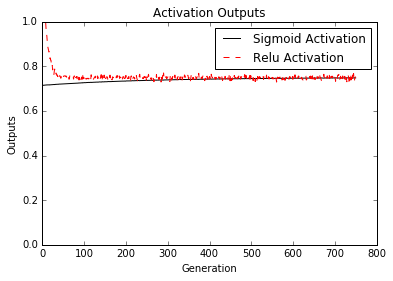

In [8]:
plt.plot(sigmoid_activations, 'k-', label='Sigmoid Activation')
plt.plot(relu_activations, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()

In [9]:
relu_activations

[1.3560017,
 1.2870871,
 1.2385077,
 1.1776142,
 1.1518244,
 1.0998701,
 1.0663027,
 1.0409136,
 1.0054089,
 0.97370303,
 0.9447909,
 0.93723756,
 0.91348976,
 0.88993227,
 0.88229156,
 0.87360692,
 0.86371279,
 0.86498088,
 0.83575797,
 0.83774894,
 0.82745469,
 0.8271904,
 0.80432773,
 0.79616553,
 0.80345935,
 0.78383958,
 0.79034996,
 0.78616697,
 0.76385087,
 0.77936995,
 0.78729874,
 0.77630043,
 0.76318341,
 0.76971376,
 0.76134688,
 0.75984079,
 0.76143098,
 0.75339776,
 0.75663942,
 0.76468301,
 0.75041026,
 0.75748056,
 0.75661576,
 0.75598955,
 0.74664146,
 0.74712104,
 0.75363511,
 0.74976212,
 0.75491202,
 0.75340593,
 0.74544477,
 0.75483656,
 0.75685728,
 0.75620431,
 0.75660878,
 0.7574411,
 0.75465477,
 0.75309861,
 0.75577372,
 0.74366689,
 0.73922491,
 0.7403779,
 0.7519232,
 0.75119919,
 0.74171454,
 0.74334693,
 0.76042825,
 0.75444198,
 0.75464308,
 0.7509951,
 0.74733222,
 0.74754351,
 0.75031531,
 0.74979949,
 0.75059599,
 0.7425409,
 0.7552163,
 0.75662315,
 0.